In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
cts = pd.read_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_unadjusted.csv")
metadata =   cts[["Experiment", "Sample", "Age"]]



In [58]:
import matplotlib.pyplot as plt

def generate_colors(n):
        colormap = plt.cm.get_cmap('tab20', n)
        colors = [colormap(i) for i in range(n)]
        return colors
    
def blot_expression(subset_data, experiments, count_experiments, colors=None, title=None):
    
    if colors is None:
        colors = generate_colors(len(experiments))
    colored = np.sum(list(count_experiments.values()))
    if len(subset_data.columns) != colored:
        raise "the columns and the experiments should be same length"
        return None
    if len(count_experiments) != len(experiments):
        raise "the count_experiments and the experiments should be same length"
        return None
    if title is None:
        title = 'Expression of Gene Expression Across Experiments'
    boxes=[]
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    start_c = 0
    end_c = len(subset_data.columns)
    color_i = 0
    for exp in experiments:
        end_c=start_c + count_experiments[exp]
        # Boxplot for the first 84 columns
        box= ax.boxplot(subset_data.iloc[:, start_c:end_c], positions=list(range(start_c+1,end_c+1)), showfliers=False, patch_artist=True,
                          boxprops=dict(facecolor=colors[color_i], color=colors[color_i])
                          )
        start_c = end_c
        boxes.append(box)
        color_i=color_i+1
                          
    
    # Set labels and titles
    ax.set_title(title)
    ax.set_ylabel('Expression')
    
    # Adjust legend
    legends_list = [b["boxes"][0] for b in boxes]
    ax.legend(legends_list, experiments)
    
    plt.tight_layout()
    plt.show()


In [3]:
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts
experiment_order = cts["Experiment"].tolist() 
age_order = cts["Age"].tolist()


In [4]:
df =pd.DataFrame(experiment_order)
count_experiments = dict(df[0].value_counts())
count_experiments
experiments = list(count_experiments)
experiments

['GSE157585', 'GSE164471', 'GSE152558']

In [5]:
def map_to_category(age):
    if age < 35:
        return "Young"
    elif age > 65:
        return "Old"
    else:
        return "MiddleAge"

# Map values in age_order to categories
age_order = [map_to_category(age) for age in age_order]

In [6]:
cts_processed = cts.copy()
cts_processed.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)
cts_processed.set_index("Sample",  inplace=True)

In [7]:
from combat.pycombat import pycombat
data = cts.copy()

# Extract batch information into a separate variable
# Replace 'batch_column_name' with the name of the column containing batch information
batch_info = data['Experiment']

# Remove the batch column from the data
data.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)

data.set_index("Sample", inplace=True)


In [8]:
data= data.T

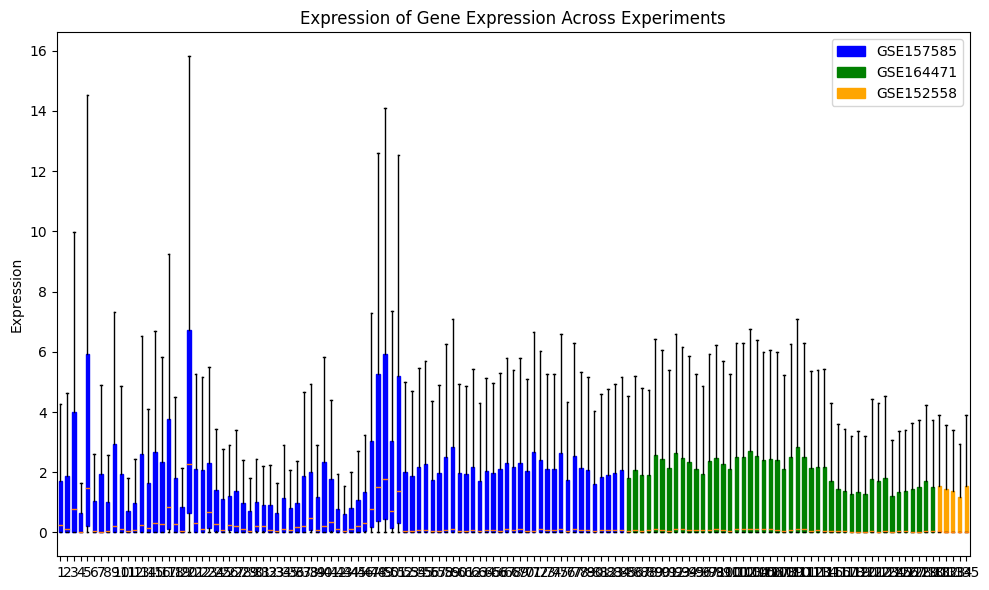

In [9]:
blot_expression(data, experiments, count_experiments, colors=["blue", "green", "orange"])

In [10]:

data = (data - data.mean()) / data.std()

data.fillna(0, inplace=True)

In [11]:
data.columns

Index(['SRR13388732', 'SRR13388733', 'SRR13388734', 'SRR13388735',
       'SRR13388736', 'SRR13388737', 'SRR13388738', 'SRR13388739',
       'SRR13388740', 'SRR13388741',
       ...
       'SRR12604218', 'SRR12604219', 'SRR12604220', 'SRR12604221',
       'SRR12604222', 'SRR12604223', 'SRR12604224', 'SRR12604225',
       'SRR12604226', 'SRR12604227'],
      dtype='object', name='Sample', length=135)

In [12]:
data[data.isna().any(axis=1)]

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR12604218,SRR12604219,SRR12604220,SRR12604221,SRR12604222,SRR12604223,SRR12604224,SRR12604225,SRR12604226,SRR12604227


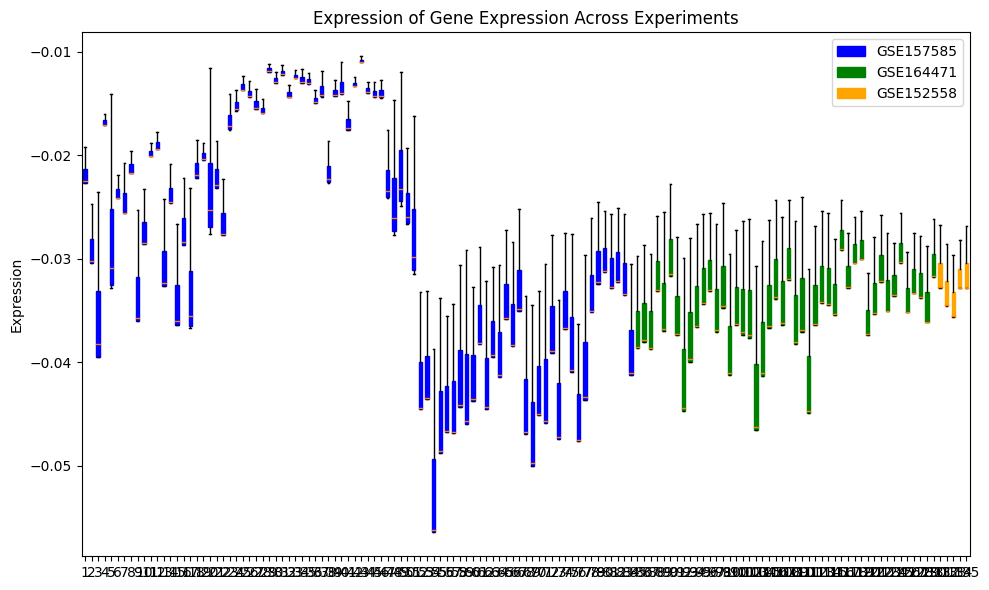

In [13]:
blot_expression(data, experiments, count_experiments, colors=["blue", "green", "orange"])

In [14]:
data_corrected = pycombat(data,batch_info, precision=0.01)

Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [15]:
data_corrected

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR12604218,SRR12604219,SRR12604220,SRR12604221,SRR12604222,SRR12604223,SRR12604224,SRR12604225,SRR12604226,SRR12604227
ENSG00000000003.14,-0.029709,-0.031103,-0.036365,-0.025616,-0.022923,-0.031271,-0.030132,-0.028227,-0.038616,-0.033153,...,-0.026145,-0.024240,-0.024869,-0.025952,-0.022256,-0.022822,-0.024012,-0.025772,-0.024238,-0.023708
ENSG00000000005.5,-0.033326,-0.039507,-0.044738,-0.028677,-0.040827,-0.034513,-0.035622,-0.032540,-0.044084,-0.037598,...,-0.028506,-0.026454,-0.026960,-0.029573,-0.024711,-0.025901,-0.027802,-0.028949,-0.025915,-0.025898
ENSG00000000419.12,0.002005,0.003005,0.004145,0.003227,0.002693,0.001870,0.005237,0.002793,0.001695,0.002502,...,0.002466,0.000276,0.001774,0.003709,0.001246,0.006956,0.006038,0.002943,0.005085,0.001069
ENSG00000000457.13,-0.030784,-0.032629,-0.040295,-0.026331,-0.036048,-0.031783,-0.030089,-0.029366,-0.037115,-0.033633,...,-0.027947,-0.024519,-0.024401,-0.027631,-0.023371,-0.024336,-0.024567,-0.026864,-0.025750,-0.024191
ENSG00000000460.16,-0.030969,-0.037750,-0.035217,-0.027739,-0.030787,-0.032722,-0.032733,-0.031354,-0.039046,-0.031952,...,-0.026892,-0.024857,-0.025442,-0.027304,-0.023068,-0.024229,-0.026235,-0.027313,-0.024637,-0.024743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,-0.031961,-0.037799,-0.044708,-0.027657,-0.039276,-0.032533,-0.032386,-0.031219,-0.042122,-0.036448,...,-0.026988,-0.026120,-0.023390,-0.028839,-0.024140,-0.025682,-0.026712,-0.027054,-0.023991,-0.025125
ENSG00000285491.1,-0.033335,-0.039469,-0.046196,-0.028813,-0.041412,-0.034514,-0.035614,-0.032555,-0.044012,-0.038050,...,-0.028501,-0.026439,-0.026948,-0.029574,-0.024687,-0.025883,-0.027794,-0.028947,-0.025897,-0.025880
ENSG00000285505.1,-0.033317,-0.039423,-0.046648,-0.028816,-0.041356,-0.034490,-0.035585,-0.032541,-0.043944,-0.038010,...,-0.028543,-0.026480,-0.026989,-0.029617,-0.024726,-0.025923,-0.027777,-0.028989,-0.025937,-0.025920
ENSG00000285508.1,-0.030483,-0.025926,-0.045080,-0.026051,-0.038771,-0.030818,-0.036266,-0.031529,-0.039435,-0.035494,...,-0.028520,-0.023889,-0.022113,-0.027439,-0.024266,-0.021547,-0.027849,-0.028562,-0.026048,-0.026032


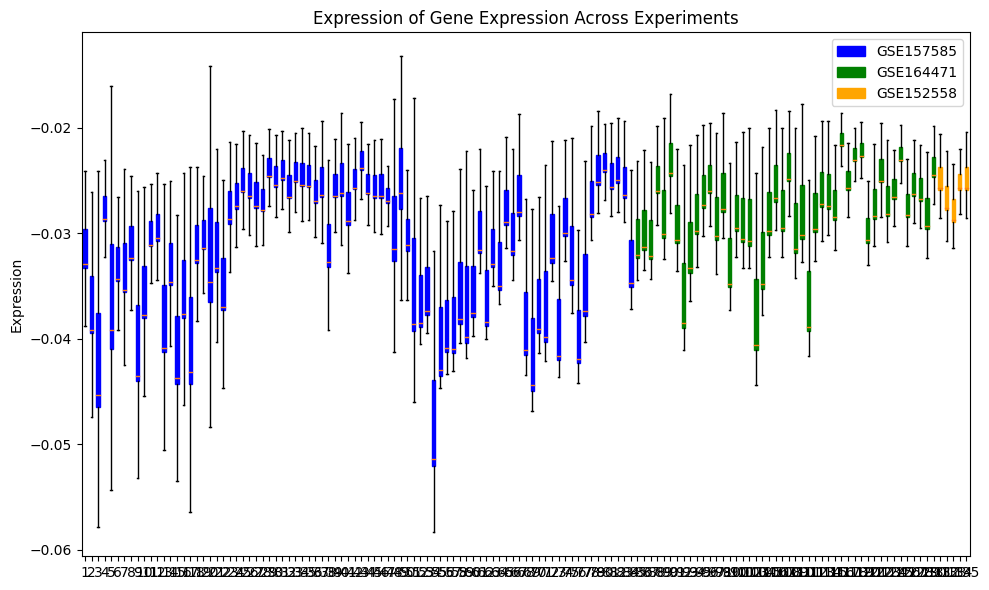

In [16]:
blot_expression(data_corrected, experiments, count_experiments, colors=["blue", "green", "orange"])

In [17]:
data_corrected = data_corrected.T

In [18]:
metadata_short =  pd.DataFrame({
    'Experiment': experiment_order,
    'Age': age_order,
    'Sample': sample_order
})
metadata_short.set_index('Sample', inplace=True)
metadata_short

,Experiment,Age
Sample,,
SRR13388732,GSE164471,Young
SRR13388733,GSE164471,Young
SRR13388734,GSE164471,Young
SRR13388735,GSE164471,Young
SRR13388736,GSE164471,MiddleAge
...,...,...
SRR12604223,GSE157585,Young
SRR12604224,GSE157585,Young
SRR12604225,GSE157585,Young


In [19]:
adjuested_data_full = pd.concat([data_corrected, metadata_short], axis=1)

In [21]:
unadjested_data_full= pd.concat([cts_processed, metadata_short], axis=1)

In [22]:
adjuested_data_full.columns[10:]

Index(['ENSG00000001460.17', 'ENSG00000001461.16', 'ENSG00000001497.16',
       'ENSG00000001617.11', 'ENSG00000001626.14', 'ENSG00000001629.9',
       'ENSG00000001630.15', 'ENSG00000001631.15', 'ENSG00000002016.17',
       'ENSG00000002079.14',
       ...
       'ENSG00000285471.1', 'ENSG00000285472.1', 'ENSG00000285476.1',
       'ENSG00000285480.1', 'ENSG00000285491.1', 'ENSG00000285505.1',
       'ENSG00000285508.1', 'ENSG00000285509.1', 'Experiment', 'Age'],
      dtype='object', length=34497)

In [23]:
adjuested_data_full.to_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_adjusted.csv")

In [24]:
unadjested_data_full.to_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_unadjusted_2.csv")

Looking at reCombat plotting

In [25]:
X = data_corrected.fillna(0, inplace=False).values 

In [26]:
X

array([[-0.02970872, -0.0333258 ,  0.00200499, ..., -0.03331705,
        -0.03048318, -0.03330771],
       [-0.0311027 , -0.03950657,  0.00300471, ..., -0.03942271,
        -0.02592574, -0.03854168],
       [-0.0363653 , -0.04473826,  0.00414531, ..., -0.04664831,
        -0.04508018, -0.04584445],
       ...,
       [-0.02577219, -0.02894936,  0.00294311, ..., -0.02898943,
        -0.02856208, -0.02888415],
       [-0.0242384 , -0.0259149 ,  0.00508524, ..., -0.02593687,
        -0.02604768, -0.02579059],
       [-0.02370841, -0.02589846,  0.0010687 , ..., -0.02592033,
        -0.026032  , -0.02574077]])

In [27]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


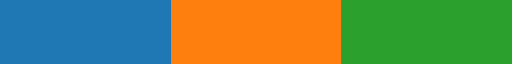

In [28]:
custom_cmap

Using tSNE


In [29]:
from sklearn.manifold import TSNE
X = data_corrected.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

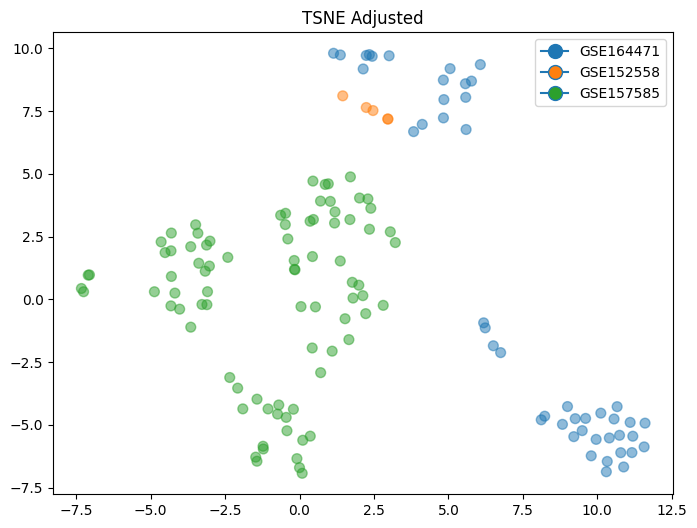

In [30]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()

plt.savefig("TSNE_Scatter_Plot_Experiment_reCombat.jpg")

Using PCA

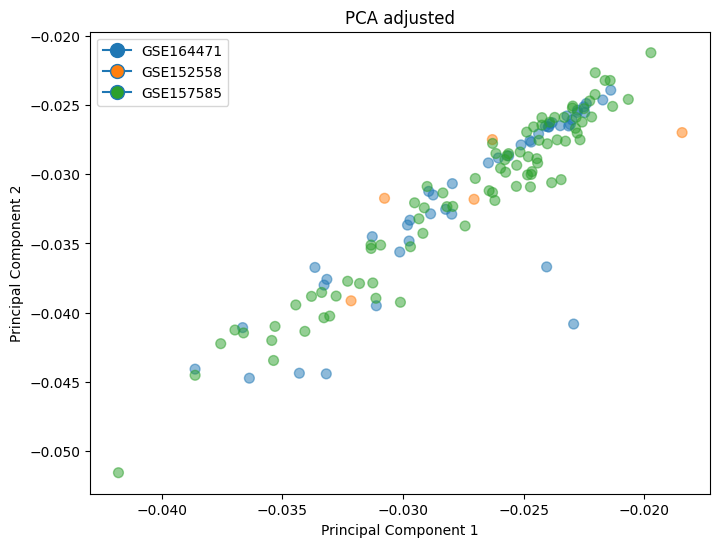

In [31]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("PCA_Scatter_Plot_Experiment_reCombat.jpg")

Lookign at the age

In [32]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


In [33]:
pd.DataFrame(age_order).value_counts()

Old          76
Young        33
MiddleAge    26
Name: count, dtype: int64

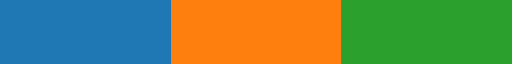

In [34]:
custom_cmap

tSNE

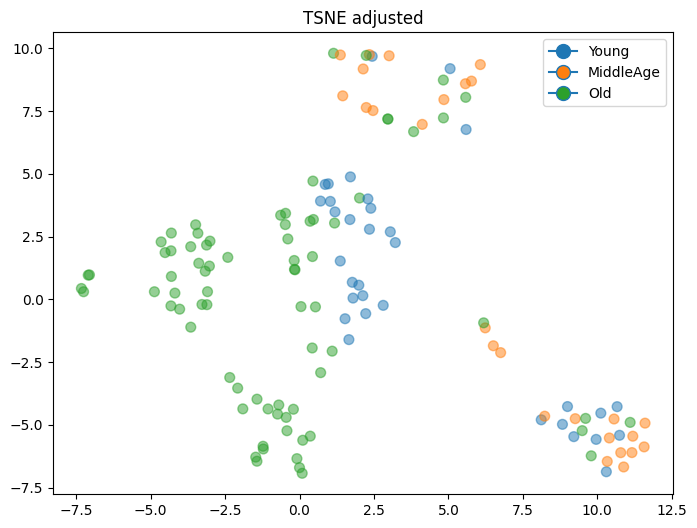

In [35]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

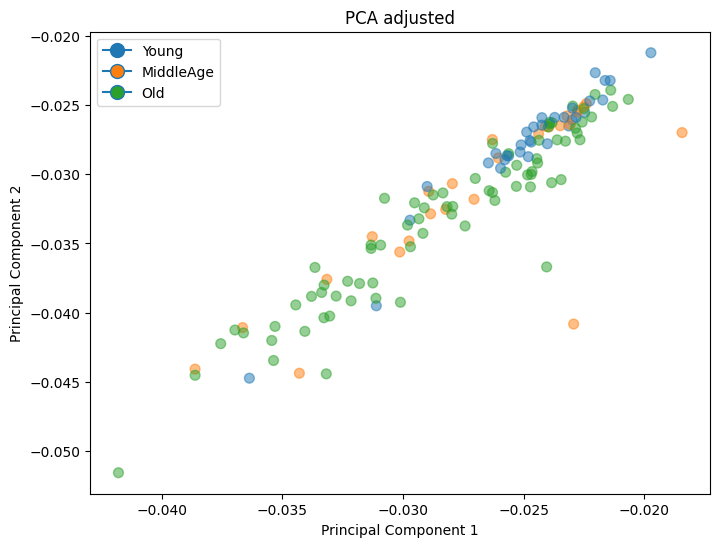

In [36]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()

plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

Unadjusted

In [37]:
X = cts_processed.values 


tSNE by experiment

In [38]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [66]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i ] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

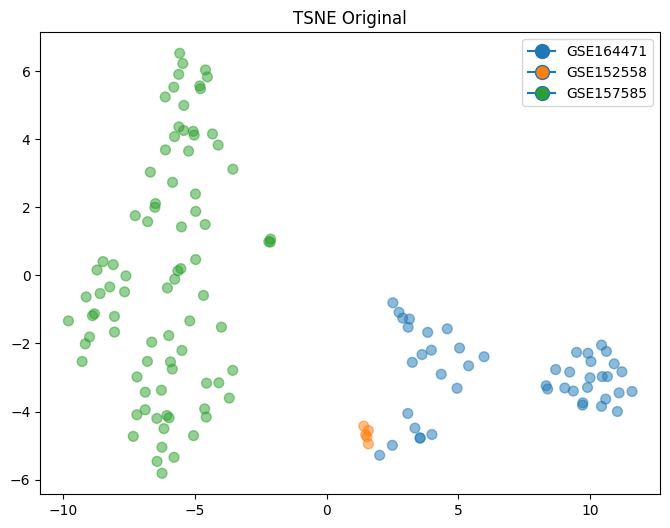

In [40]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()

plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

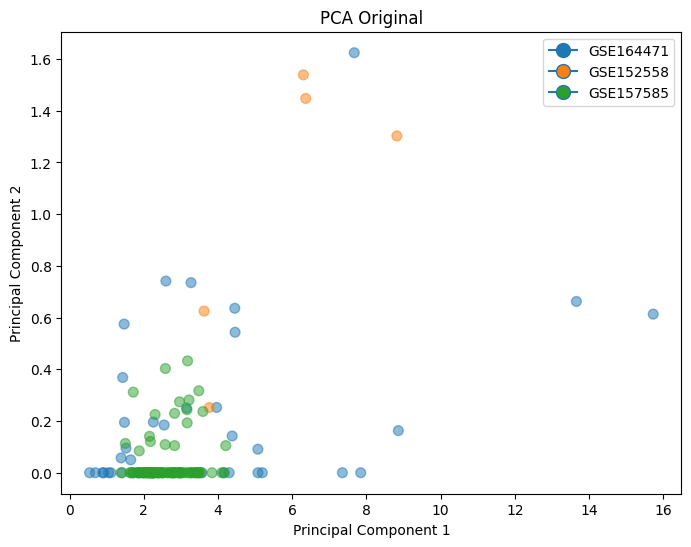

In [41]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [42]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

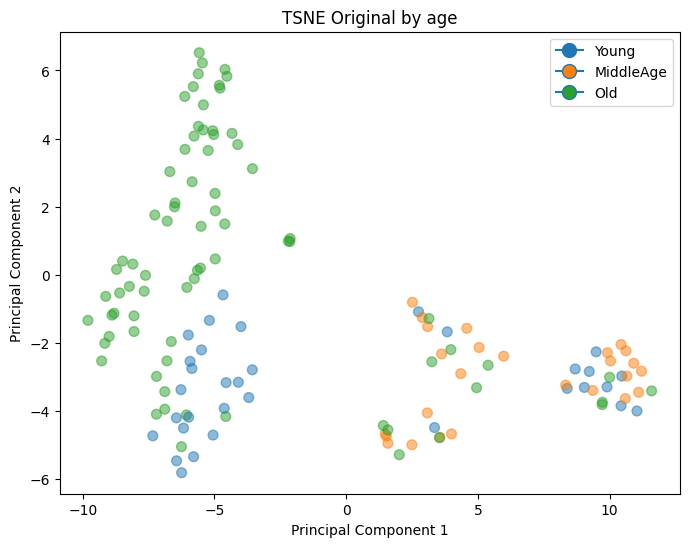

In [43]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

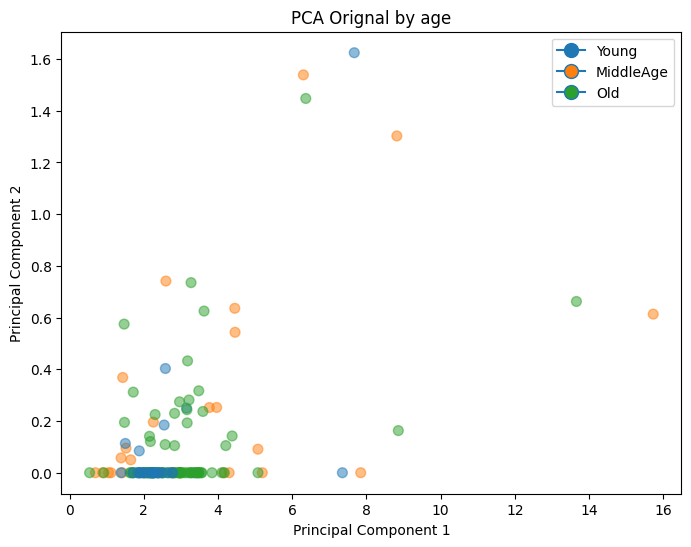

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP

In [61]:
import umap
import matplotlib.pyplot as plt

# Generate some sample data

def umap_projection(data, color_labels):
    # Perform UMAP dimensionality reduction
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(data)

    # Visualize the result
    plt.figure(figsize=(10, 8))
    
    plt.scatter(embedding[:, 0], embedding[:, 1], s=10, c=color_labels, cmap='viridis')
    plt.title('UMAP projection of the sample data')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.colorbar()
    plt.show()
    return embedding


In [ ]:
experiment_order

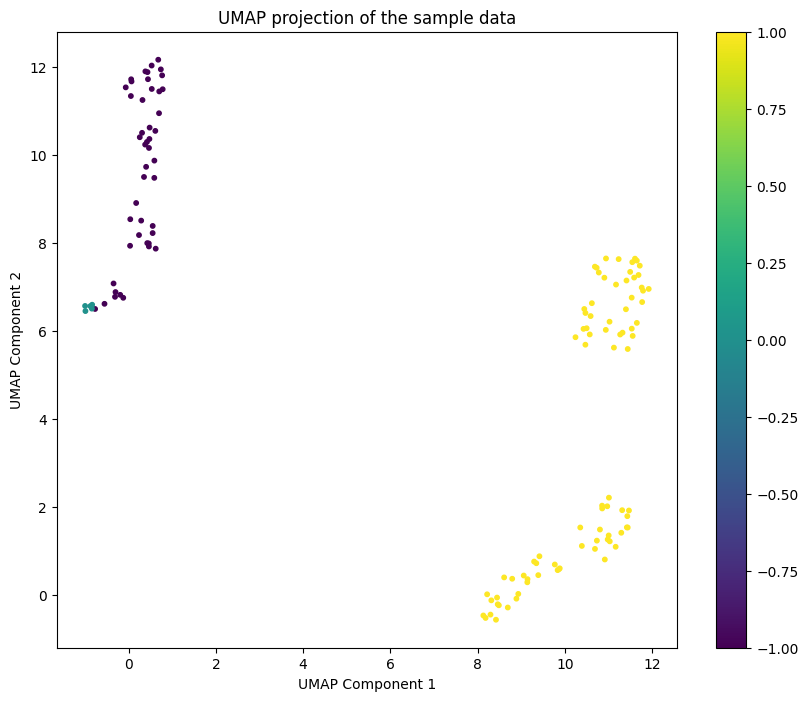

array([[-1.92078054e-01,  6.81312895e+00],
       [ 5.51950216e-01,  8.37850761e+00],
       [ 4.64874297e-01,  7.91263342e+00],
       [ 4.66680259e-01,  1.01508484e+01],
       [ 4.01034027e-01,  9.72206688e+00],
       [-3.45050752e-01,  7.07127476e+00],
       [ 5.88692486e-01,  9.47110081e+00],
       [ 5.90407550e-01,  9.86312866e+00],
       [ 4.27221835e-01,  7.98834276e+00],
       [ 2.38020495e-01,  8.17127132e+00],
       [-3.00058186e-01,  6.87604761e+00],
       [-1.22829981e-01,  6.74588871e+00],
       [ 4.63057727e-01,  7.98011637e+00],
       [ 3.81468013e-02,  8.53094006e+00],
       [ 6.20901406e-01,  7.86229897e+00],
       [ 2.88109481e-01,  8.49975204e+00],
       [ 5.50841093e-01,  8.21669483e+00],
       [ 1.73028529e-01,  8.89992905e+00],
       [-3.11467469e-01,  6.76748562e+00],
       [-5.52583337e-01,  6.60907555e+00],
       [ 3.52766752e-01,  9.49181366e+00],
       [ 3.31595391e-02,  7.92798901e+00],
       [ 4.20150787e-01,  1.02871618e+01],
       [ 3.

In [67]:
umap_projection(data.T, numeric_experiment_order)

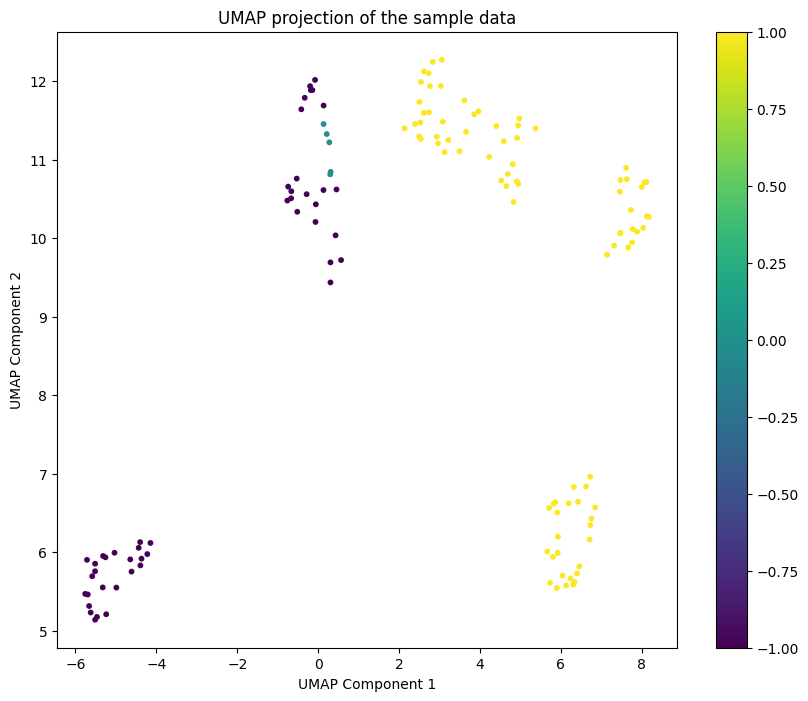

array([[-0.33224148, 11.787048  ],
       [-0.06518298, 10.205305  ],
       [-0.6684796 , 10.506944  ],
       [-4.401153  ,  6.126805  ],
       [ 0.56682587,  9.719609  ],
       [-0.4164236 , 11.640422  ],
       [ 0.3042509 ,  9.690369  ],
       [ 0.30484906,  9.434566  ],
       [-0.7415601 , 10.655544  ],
       [-0.28484693, 10.5593605 ],
       [-0.19939028, 11.935382  ],
       [ 0.13485047, 11.688494  ],
       [-0.66321576, 10.596456  ],
       [ 0.13193093, 10.61166   ],
       [-0.76182914, 10.477561  ],
       [-0.05759894, 10.430011  ],
       [-0.51621246, 10.335156  ],
       [ 0.45349324, 10.619052  ],
       [-0.07660183, 12.014858  ],
       [-0.18014112, 11.884734  ],
       [ 0.43051225, 10.0347185 ],
       [-0.5297132 , 10.757485  ],
       [-4.1462903 ,  6.115675  ],
       [-4.3942404 ,  5.82983   ],
       [-5.5160213 ,  5.75545   ],
       [-5.0349903 ,  5.9912615 ],
       [-5.4688    ,  5.173397  ],
       [-4.4369326 ,  6.0540767 ],
       [-5.258919  ,

In [68]:
umap_projection(data_corrected, numeric_experiment_order)

In [51]:
embedding

array([[ 5.1460924 , -1.813027  ],
       [-0.92242414,  5.893354  ],
       [12.059756  ,  0.9823986 ],
       ...,
       [-5.9233527 ,  7.174099  ],
       [ 1.6658264 ,  1.1566827 ],
       [-0.5007195 ,  4.121679  ]], dtype=float32)

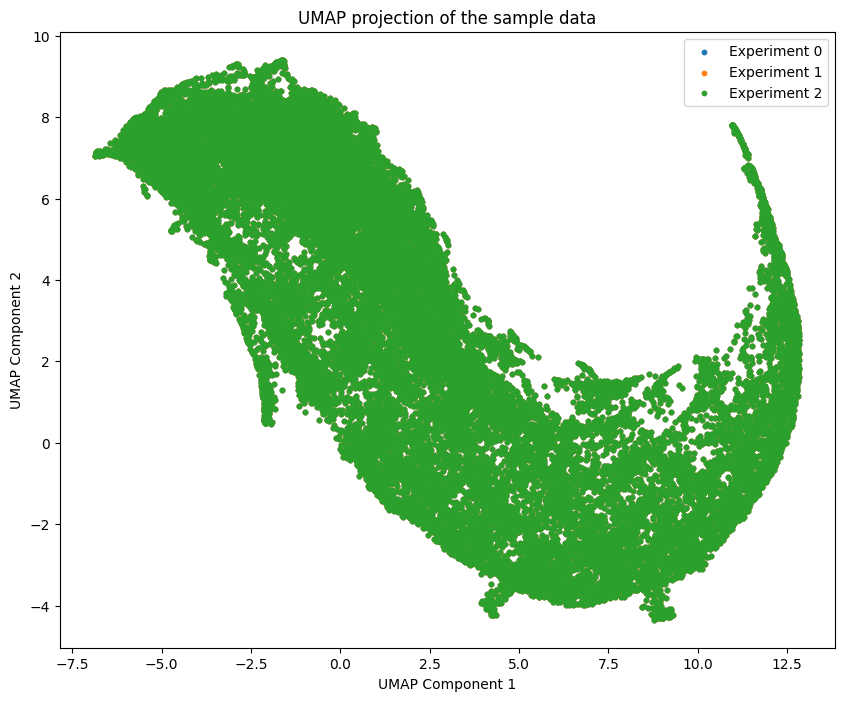

In [50]:
experiment_colors = ['tab:blue', 'tab:orange', 'tab:green']  # Example colors, replace with your colors

# Generate UMAP embedding
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Visualize the result with experiment colors
plt.figure(figsize=(10, 8))

plt.title('UMAP projection of the sample data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()